In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# Connecting Google colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the tetecast data set using pandas read_csv() function as df
df = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
# Getting the shape of the data set
print('Number of Rows of the data frame df is:', df.shape[0])
print('Number of Columns of the data frame df is:', df.shape[1])

Number of Rows of the data frame df is: 1000
Number of Columns of the data frame df is: 12


In [5]:
# Getting the Column names of the data set
print('The column names are:', df.columns.values)

The column names are: ['region' 'tenure' 'age' 'marital' 'address' 'income' 'ed' 'employ'
 'retire' 'gender' 'reside' 'custcat']


In [6]:
# Getting the type of the columns used in the data frame
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [7]:
# Getting total number of outcomes per cuscat types
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [8]:
# Defining the Feature set
x = df[['region', 'tenure','age','marital','address',
        'income','ed','employ','retire','gender',
        'reside']].values # As sklearn package  only works on arrays
x[0:5] # Getting the first 5 values

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [9]:
# Defining the lables
y = df[['custcat']].values
y[0:5] # Getting first five label values

array([[1],
       [4],
       [3],
       [1],
       [3]])

In [10]:
# Train and Test Split
# We use train_test_split module of sklearn in this case
# 80% of data is considered as train set
# 20% of data is considered as test set
train_x, test_x, train_y, test_y = train_test_split(x,y,
                                                    test_size = 0.2,
                                                    random_state = 4)
print('Train set:', train_x.shape, train_y.shape)
print('Test set:', test_x.shape, test_y.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


In [11]:
# Normalization of data of independent component of train set and test set
# Normalization of Train set
train_x_norm = preprocessing.StandardScaler().fit(train_x).transform(train_x.astype(float))
print(train_x_norm[0:5]) # First five entries of normalized independent train set

print('------------------------------------------------------------------------------------------')

# Normalization of Test set
test_x_norm = preprocessing.StandardScaler().fit(test_x).transform(test_x.astype(float))
print(test_x_norm[0:5]) # First five entries of normalized independent test set

[[-1.28618818e+00 -1.53085556e+00 -8.49354628e-01  1.00752834e+00
  -7.46393214e-01 -4.83608776e-01  1.12305195e+00 -7.02283455e-01
  -2.23313158e-01 -1.01005050e+00  1.83304333e+00]
 [-4.79805457e-02  2.51253999e-01  3.44957012e-01  1.00752834e+00
   2.45326718e-01 -2.71543263e-01 -5.40728715e-01 -1.25385370e-04
  -2.23313158e-01 -1.01005050e+00  1.83304333e+00]
 [-1.28618818e+00 -7.80493639e-01 -6.90113076e-01  1.00752834e+00
  -5.21892614e-02 -4.92444839e-01 -1.37261905e+00 -8.02591750e-01
  -2.23313158e-01 -1.01005050e+00  1.83304333e+00]
 [-4.79805457e-02 -1.53085556e+00 -3.71629972e-01 -9.92527915e-01
   1.46154725e-01 -4.74772713e-01 -1.37261905e+00 -8.02591750e-01
  -2.23313158e-01  9.90049504e-01 -9.33814526e-01]
 [ 1.19022709e+00 -2.17722200e-01 -6.10492300e-01 -9.92527915e-01
  -2.50533248e-01  2.40948394e-01  1.12305195e+00 -4.01358568e-01
  -2.23313158e-01  9.90049504e-01  1.14132887e+00]]
------------------------------------------------------------------------------------

In [ ]:
# Building the KNN model and predicting with Model Evaluation Metrics
# Consider k = 4
k = 4
neigh4 = KNeighborsClassifier(n_neighbors = k).fit(train_x_norm, train_y)
neigh4

# Prediction part of the model (Predicted values)
y_hat4 = neigh4.predict(test_x_norm)
print('The first five predicted custcat will be:', y_hat4[0:5])

# Checking Accuracy of the model
print('Accuracy of Train set:', metrics.accuracy_score(train_y,
                                                       neigh4.predict(train_x_norm)))
print('Accuracy of Test set:', metrics.accuracy_score(test_y, y_hat4))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The first five predicted custcat will be: [3 1 3 2 4]
Accuracy of Train set: 0.5475
Accuracy of Test set: 0.33


In [12]:
# Building the KNN model and predicting with Model Evaluation Metrics
# Consider k = 4
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(train_x_norm, train_y)
neigh6

# Prediction part of the model (Predicted values)
y_hat6 = neigh6.predict(test_x_norm)
print('The first five predicted custcat will be:', y_hat6[0:5])

# Checking Accuracy of the model
print('Accuracy of Train set:', metrics.accuracy_score(train_y,
                                                       neigh6.predict(train_x_norm)))
print('Accuracy of Test set:', metrics.accuracy_score(test_y, y_hat6))

The first five predicted custcat will be: [3 3 3 2 4]
Accuracy of Train set: 0.5125
Accuracy of Test set: 0.335


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Interpretation
As we are changing the Number of Neighbohoods, then the Model Accuracy will change autometically. So, it is needed to find that k for which the model accuracy is best.

In [14]:
# Finding the accuracy of the KNN model
# Consider highest value of k is 10
kn = 11
mean_acc = np.zeros((kn-1))
std_acc = np.zeros((kn-1))

for n in range(1,kn):
  neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x_norm, train_y)
  y_hat = neigh.predict(test_x_norm)
  mean_acc[n-1] = metrics.accuracy_score(test_y, y_hat)
  std_acc[n-1] = np.std(y_hat == test_y)/np.sqrt(y_hat.shape[0])

mean_acc

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

array([0.32 , 0.315, 0.335, 0.33 , 0.34 , 0.335, 0.35 , 0.34 , 0.335,
       0.345])

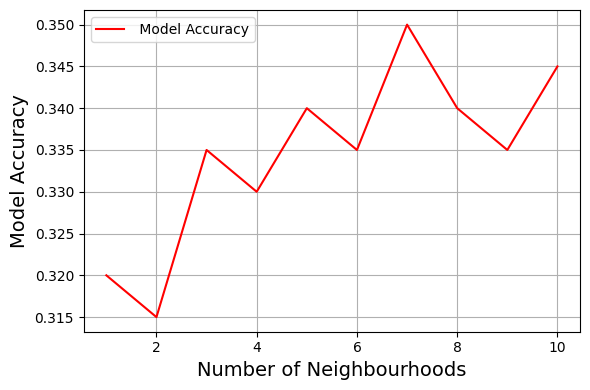

In [19]:
# Graphically representing the mean accuracy of the models with the best k value
plt.figure(figsize = (6,4))
plt.plot(range(1,kn), mean_acc, 'red')
plt.legend([' Model Accuracy'])
plt.xlabel('Number of Neighbourhoods', fontsize = 14)
plt.ylabel('Model Accuracy', fontsize = 14)
plt.tight_layout()
plt.grid(True)
plt.show()

In [17]:
# So we can see that Model Accuracy is highest in between 6 and 8 i.e. 7
# Code to get the Number of Neighbourhood considered with Model Accuracy
print('Best Model Accuracy', mean_acc.max(), 'with k = ', mean_acc.argmax()+1)

Best Model Accuracy 0.35 with k =  7
